# Question 3

1.We load dataset and create patches of 6X6 at random places in image

In [43]:
from sklearn.datasets import load_sample_images, fetch_lfw_people
import numpy as np
import random


# Load data set
dataSet = fetch_lfw_people()
listpatches = np.empty([1500,36])
imset = dataSet.images[0:50,1:61,2:44] / 255.0
for k in range(0,imset.shape[0]):
    image = imset[k,:,:]
    [xd,yd] = [int(image.shape[0]/6),int(image.shape[1]/6)]
    currentPatch = np.empty([xd*yd,6,6])
    for i in range(0, xd):
        for j in range (0,yd):
            currentPatch[i*yd+j]=image[i*6:(6*i+6),j*6:(6*j+6)]  
    img = random.sample(range(0, 70), 30)
    listpatches[k*30:(30+(k*30)),:] = np.reshape(currentPatch[img,:,:],(30,-1), order='C');    

2.we preform pca on the data set, by taking an patch of 6X6 and reducing its dimention to d. 
Using a transformation matrix we compress the patch to lower dimensions, and using the inverse transformation matrix we reconstruct the patch

3.we propose the following dimension reduction procedure:
we choose an image from dataset and extract a subset of patches from data set. 
we reduce the dimension of each patch using the pca procedure presentend in [2].
using the inverse transformation matrix on the patches, we can then restore the image, and present it.

In [2]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


meanslist = []
linx = np.linspace(3,30,28)
for d in linx:
    pca_d  = PCA(n_components=int(d)).fit(listpatches)
    Errors = np.empty([100])
    imNUM  = random.sample(range(50, dataSet.images.shape[0]), 100)
    for num in range(0,100):
        #retrieve patches
        image = dataSet.images[imNUM[num],1:61,2:44]/255    
        [xd,yd] = [int(image.shape[0]/6),int(image.shape[1]/6)]
        currentPatch = np.empty([xd*yd,6,6])
        for i in range(0, xd):
            for j in range (0,yd):
                currentPatch[i*yd+j]=image[i*6:(6*i+6),j*6:(6*j+6)]
        #reshape patches
        listpatchesReshaped = np.reshape(currentPatch,(-1,36),order='C')
        #PCA
        transformed = pca_d.transform(listpatchesReshaped)
        reconstructed = pca_d.inverse_transform(transformed)
        #error calc
        diff = reconstructed - listpatchesReshaped
        Errors[num] = np.mean(np.abs(diff**2))
        
    meanslist.append( d/(36) + np.mean(Errors))


4.
The quality is defined as: $$ quality= \frac{d_I}{D_I} + E_{I~P(I)} [\frac{1}{D_i} \sum_{i=1}^{D_I}{ | I_i-\hat{I_I}|}]$$

The first part represents the compression ratio.

The second part represents the reconstruction error.

We choose random images from the dataset and estimate the expectation value, to every d.

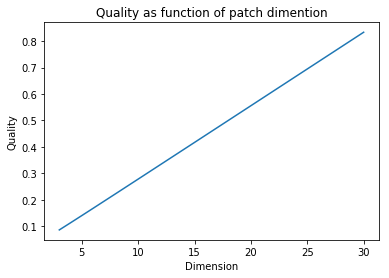

In [3]:
# Plot 
fig = plt.figure()
plt.title('Quality as function of patch dimention')
plt.plot(linx, meanslist)
plt.ylabel('Quality')
plt.xlabel('Dimension')
plt.show()  

5.To find the best d we'll use the same method used in tutorial 5 to estimated the normilized reconstruction error:
$$ err_k =\frac{\|pinv(W_k)*W_k^T*X-X\|^2}{\|X\|^2} $$

Using this function we can get that the best d is 12.

6.

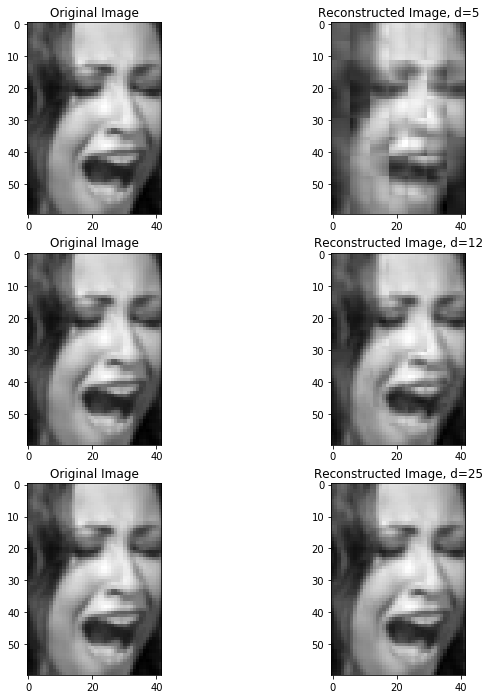

In [46]:
randomIndex = random.sample(range(50, dataSet.images.shape[0]), 1)
sImgparams = dataSet.images[randomIndex, 1:61, 2:44]
image = np.reshape(sImgparams, (sImgparams.shape[1], sImgparams.shape[2]))
figrestored = plt.figure(figsize=(10, 12))
I= 1
for d in [5,12,25]:
    figrestored.add_subplot(3,2,I)
    plt.title('Original Image')
    plt.imshow(image, cmap='gray')
    pca_d = PCA(n_components=int(d)).fit(listpatches)
    # compress and reconstruct image 
    [xd,yd] = [int(image.shape[0]/6),int(image.shape[1]/6)]
    currentPatch = np.empty([xd*yd,6,6])
    for i in range(0, xd):
        for j in range (0,yd):
            currentPatch[i*yd+j]=image[i*6:(6*i+6),j*6:(6*j+6)]
    #reshape patches
    listpatchesReshaped = np.reshape(currentPatch,(-1,36),order='C')
    #PCA
    transformed = pca_d.transform(listpatchesReshaped)
    reconstructed = pca_d.inverse_transform(transformed)
    # show reconstructed image
    blocks      = np.reshape(reconstructed,(-1,6,6),order='C')
    #reconstructBlock(blocks, images.shape)
    width = blocks.shape[2]
    [xd,yd] = [int(image.shape[0]/width),int(image.shape[1]/width)]
    imageRecon  = np.empty(image.shape)
    for i in range(0, xd):
        for j in range (0,yd):
            imageRecon[width*i:width*(i+1),width*j:width*(j+1)] = blocks[i*yd+j]
    figrestored.add_subplot(3,2,I+1)
    I+=2
    plt.title('Reconstructed Image, d={}'.format(d))
    plt.imshow(imageRecon, cmap='gray')
    
plt.show()

3.6
As we can see, in every reduction, the image is reconisable, but for d=15, we can barely spot a difference between the original and the reconstructed, thus d = 15 is enough for good restoration.